In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Import and Load

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

In [4]:
path = r'C:\Users\ASUS\Documents\12_FALL 23\CSE488-Big Data Analytics\Project\Books Data with Category Language and Summary\Preprocessed_data.csv'
df = pd.read_csv(path)

In [5]:
# path = r"C:\Users\ASUS\Documents\12_FALL 23\CSE488-Big Data Analytics\Project\Book reviews\Book reviews\BX-Book-Ratings.csv"
# df = pd.read_csv(path , sep=";", encoding="latin-1")

In [6]:
df.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


# Preprocessing

## Overall analysis

In [7]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
df.drop(['img_s', 'img_m', 'img_l', 'Summary', 'city', 'state', 'country'], axis = 1, inplace = True)

In [9]:
df.shape

(1031175, 11)

In [10]:
df.columns

Index(['user_id', 'location', 'age', 'isbn', 'rating', 'book_title',
       'book_author', 'year_of_publication', 'publisher', 'Language',
       'Category'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_id              1031175 non-null  int64  
 1   location             1031175 non-null  object 
 2   age                  1031175 non-null  float64
 3   isbn                 1031175 non-null  object 
 4   rating               1031175 non-null  int64  
 5   book_title           1031175 non-null  object 
 6   book_author          1031174 non-null  object 
 7   year_of_publication  1031175 non-null  float64
 8   publisher            1031175 non-null  object 
 9   Language             1031175 non-null  object 
 10  Category             1031175 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.5+ MB


In [12]:
df.isnull().sum()

user_id                0
location               0
age                    0
isbn                   0
rating                 0
book_title             0
book_author            1
year_of_publication    0
publisher              0
Language               0
Category               0
dtype: int64

In [13]:
df.nunique()

user_id                 92107
location                22480
age                        93
isbn                   270170
rating                     11
book_title             241090
book_author            101593
year_of_publication       104
publisher               16729
Language                   33
Category                 6448
dtype: int64

In [14]:
print(df['rating'].unique())


[ 0  5  8  9  7  6 10  4  3  2  1]


In [15]:
ratings = df['rating'].value_counts()
print("Rating Frequencies:", ratings)

Rating Frequencies: rating
0     647323
8      91806
10     71227
7      66404
9      60780
5      45355
6      31689
4       7617
3       5118
2       2375
1       1481
Name: count, dtype: int64


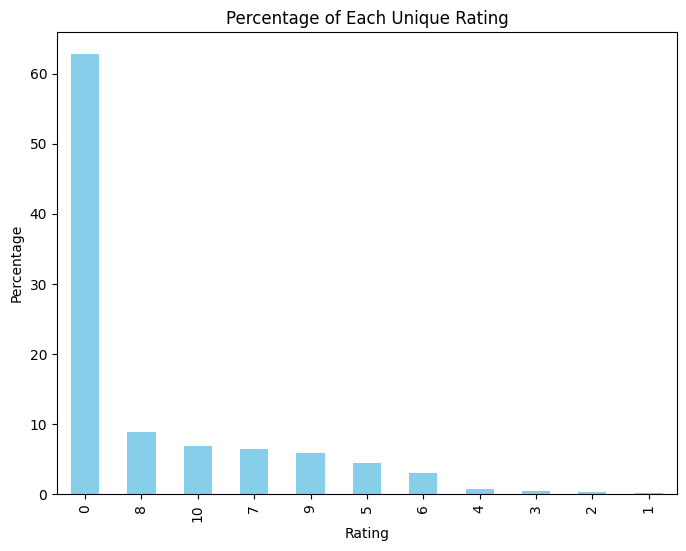

In [16]:
percentage_ratings = (ratings / len(df['rating'])) * 100
plt.figure(figsize=(8, 6))
percentage_ratings.plot(kind='bar', color='skyblue')
plt.title('Percentage of Each Unique Rating')
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.show()

## User Analysis

In [17]:
print("Number of Users: ")
df['user_id'].nunique()

Number of Users: 


92107

In [18]:
print("Ratings given by each user: ")
df.groupby('user_id')['rating'].count().sort_values(ascending= False)

Ratings given by each user: 


user_id
11676     11144
198711     6456
153662     5814
98391      5779
35859      5646
          ...  
137038        1
137043        1
137049        1
137055        1
2             1
Name: rating, Length: 92107, dtype: int64

In [19]:
print("Number of users who has given more then 100 reviews: ")
temp = df.groupby('user_id')['rating'].count()
users = temp[temp>100]
users.shape

Number of users who has given more then 100 reviews: 


(1648,)

In [20]:
user_df = df[df['user_id'].isin(users.index)]
user_df.head()

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,Language,Category
3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses']
6,85526,"victoria, british columbia, canada",36.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses']
7,96054,"ottawa, ontario, canada",29.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses']
10,177458,"ottawa, ontario, canada",29.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses']
13,219008,"halifax, nova scotia, canada",60.0000,0002005018,7,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses']


In [21]:
user_df.shape

(591914, 11)

# Books Analysis

In [22]:
print("Ratings of each book: ")
df.groupby('isbn')['rating'].count().sort_values(ascending= False)

Ratings of each book: 


isbn
0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
              ... 
0590662082       1
059066218X       1
0590664700       1
0590664719       1
B0002K6K8O       1
Name: rating, Length: 270170, dtype: int64

In [23]:
print("Number of books that has got more then 100 reviews: ")
temp = df.groupby('isbn')['rating'].count()
books = temp[temp>100]
books.shape

Number of books that has got more then 100 reviews: 


(717,)

In [24]:
# book_df = df[df['isbn'].isin(books.index)]
# book_df.head()

In [25]:
# merged_df = user_df.merge(book_df, on='title')
# merged_df.shape

Trying to keep the frequently rated books in book_df

In [26]:
book_df = df.groupby('isbn')['rating'].count().reset_index()

In [27]:
book_df.sort_values(by = 'rating', ascending=False)

,isbn,rating
215968,0971880107,2502
38572,0316666343,1295
70803,0385504209,883
7345,0060928336,732
32372,0312195516,723
...,...,...
127842,0590662082,1
127843,059066218X,1
127845,0590664700,1
127846,0590664719,1


In [28]:
book_df.rename(columns={'rating': 'num_rating'}, inplace= True)

# Merging User and Book

In [29]:
merged_df = user_df.merge(book_df, on = 'isbn', how='inner')

In [30]:
merged_df.shape

(591914, 12)

In [31]:
merged_df.head().sort_values(by='rating')

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,Language,Category,num_rating
1,85526,"victoria, british columbia, canada",36.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],14
2,96054,"ottawa, ontario, canada",29.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],14
3,177458,"ottawa, ontario, canada",29.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],14
4,219008,"halifax, nova scotia, canada",60.0000,0002005018,7,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],14
0,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],14


In [32]:
# selecting only those books which has been rated more than 100 times
merged_df = merged_df[merged_df['num_rating']>100]
merged_df.shape

(63669, 12)

In [33]:
merged_df.head()

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,Language,Category,num_rating
35,2977,"richland, washington, usa",25.0000,0440234743,0,The Testament,John Grisham,1999.0,Dell,en,['Fiction'],422
36,3363,"knoxville, tennessee, usa",29.0000,0440234743,0,The Testament,John Grisham,1999.0,Dell,en,['Fiction'],422
37,7346,"sunnyvale, california, usa",49.0000,0440234743,9,The Testament,John Grisham,1999.0,Dell,en,['Fiction'],422
38,9747,"o`fallon, missouri, usa",34.7439,0440234743,0,The Testament,John Grisham,1999.0,Dell,en,['Fiction'],422
39,9856,"glendale, colorado, usa",22.0000,0440234743,0,The Testament,John Grisham,1999.0,Dell,en,['Fiction'],422


In [34]:
# there were 1638 users who has rated more then 100 books
# and 4100 books which have been rated more then 30 times
merged_df.nunique()

user_id                1616
location               1076
age                      63
isbn                    717
rating                   11
book_title              664
book_author             316
year_of_publication      28
publisher               126
Language                  2
Category                 42
num_rating              231
dtype: int64

In [35]:
ratings = merged_df['rating'].value_counts()
print("Rating Frequencies:", ratings)

Rating Frequencies: rating
0     45849
8      4410
10     3899
9      3615
7      2762
5      1438
6      1168
4       249
3       147
2        71
1        61
Name: count, dtype: int64


In [36]:
user_book_matrix = merged_df.pivot_table(index = 'user_id', columns='isbn', values = 'rating')
user_book_matrix.shape

(1616, 717)

In [37]:
user_book_matrix.head()

isbn,002542730X,0060008032,0060096195,006016848X,0060173289,0060175400,006019491X,0060199652,0060391626,0060392452,...,1558744630,1558745157,1559029838,1573225517,1573225789,1573227331,1573229326,1573229571,1592400876,1878424319
user_id,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# user_book_matrix.to_csv('user_book_mat.csv')
# merged_df.to_csv('merged_df.csv')

In [39]:

print(f'Total cells: ', user_book_matrix.shape[0] * user_book_matrix.shape[1])
print(f'Missing cells: ', user_book_matrix.isnull().sum().sum())
print(f'Missing percenatge:', (user_book_matrix.isnull().sum().sum())/(user_book_matrix.shape[0] * user_book_matrix.shape[1]))

Total cells:  1158672
Missing cells:  1095003
Missing percenatge: 0.9450500227847053
